In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #for 3d plot

In [ ]:
data=pd.read_csv('/content/houseprice.zip')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29135 entries, 0 to 29134
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       29135 non-null  int64 
 1   City             29135 non-null  object
 2   Price            29135 non-null  int64 
 3   Area             29135 non-null  int64 
 4   Location         29135 non-null  object
 5   No. of Bedrooms  29135 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.3+ MB


In [ ]:
data.describe()

,Unnamed: 0,Price,Area,No. of Bedrooms
count,29135.000000,2.913500e+04,29135.000000,29135.000000
mean,3058.808238,1.195267e+07,1301.816475,2.421074
std,1923.174050,2.387647e+07,767.862339,0.821016
min,0.000000,2.000000e+06,200.000000,1.000000
25%,1431.000000,4.179999e+06,870.000000,2.000000
50%,2891.000000,6.884999e+06,1137.000000,2.000000
75%,4539.500000,1.230000e+07,1504.000000,3.000000
max,7718.000000,8.546000e+08,16000.000000,9.000000


In [ ]:
data.columns

Index(['Unnamed: 0', 'City', 'Price', 'Area', 'Location', 'No. of Bedrooms'], dtype='object')

In [ ]:
df=data.drop('Unnamed: 0',axis=1)

In [ ]:
df.columns

Index(['City', 'Price', 'Area', 'Location', 'No. of Bedrooms'], dtype='object')

In [ ]:
df.isna().sum()

City               0
Price              0
Area               0
Location           0
No. of Bedrooms    0
dtype: int64

In [ ]:
df['price_per_sqft']= df['Price']/df['Area'] #newcolumn is made

In [ ]:
df.head()

,City,Price,Area,Location,No. of Bedrooms,price_per_sqft
0,Bangalore,30000000,3340,JP Nagar Phase 1,4,8982.035928
1,Bangalore,7888000,1045,Dasarahalli on Tumkur Road,2,7548.325359
2,Bangalore,4866000,1179,Kannur on Thanisandra Main Road,2,4127.226463
3,Bangalore,8358000,1675,Doddanekundi,3,4989.850746
4,Bangalore,6845000,1670,Kengeri,3,4098.802395


# **EDA**

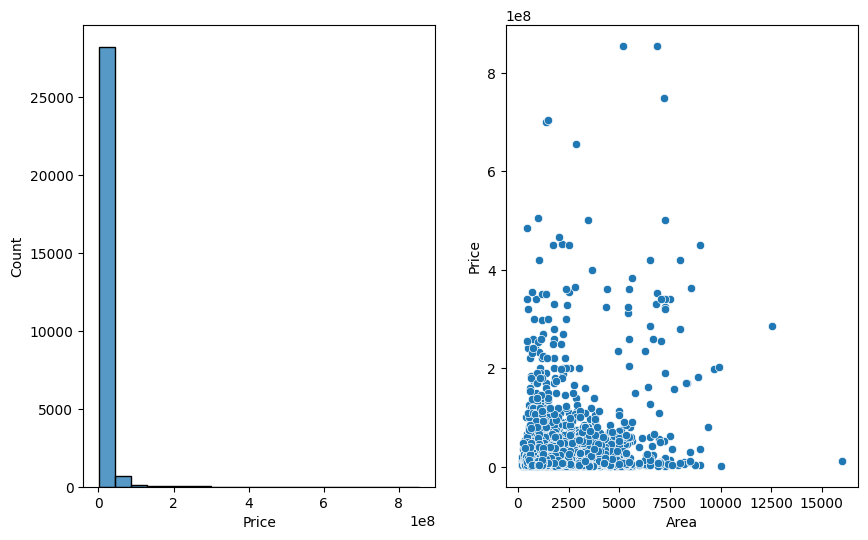

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(df['Price'],bins=20)
plt.subplot(1,2,2)
sns.scatterplot(x='Area',y='Price',data=df)
plt.show()

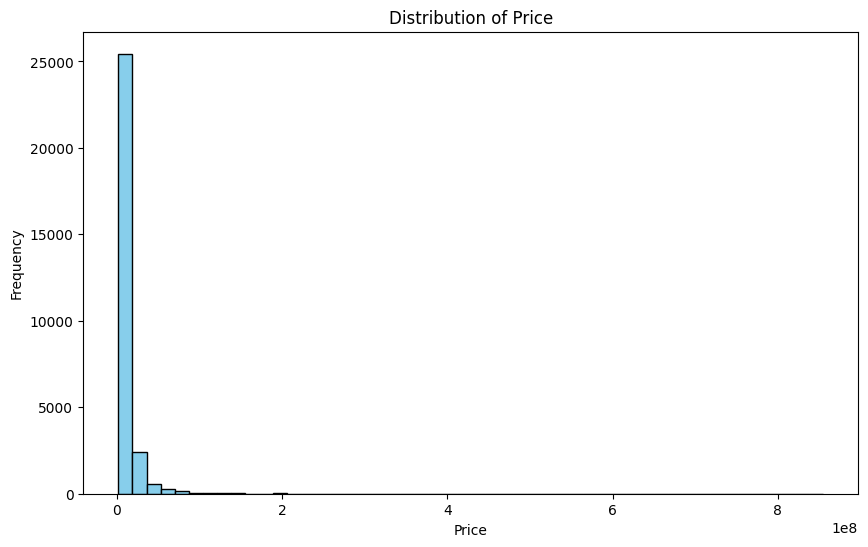

In [ ]:
plt.figure(figsize = (10,6))
plt.hist(df['Price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

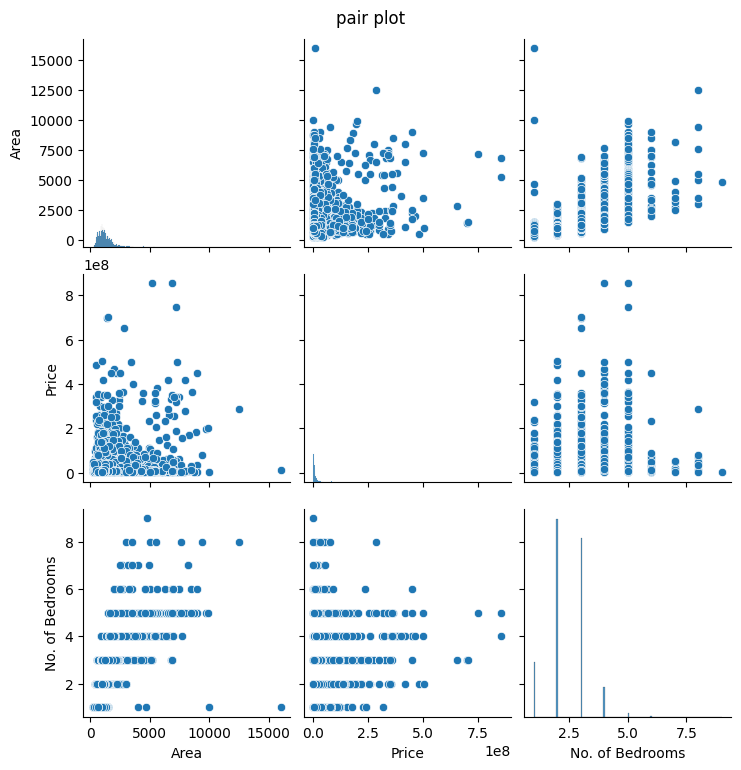

In [ ]:
sns.pairplot(df[['Area','Price','No. of Bedrooms']])
plt.suptitle('pair plot',y = 1.02)
plt.show()

# **3d plot**

In [ ]:
px.scatter_3d(df , x='Area' , y='Price', z='No. of Bedrooms',title='3D Scatter plot')


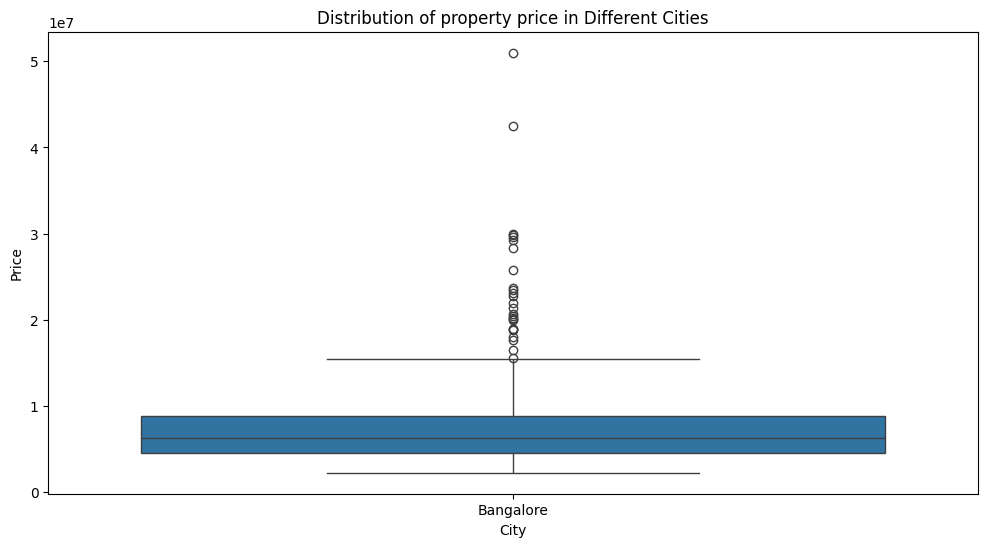

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'City',y = 'Price',data=df.head(500))
plt.title('Distribution of property price in Different Cities')
plt.show()

# **Linear Regression Model Implementation**

In [ ]:
df.columns

Index(['City', 'Price', 'Area', 'Location', 'No. of Bedrooms',
       'price_per_sqft'],
      dtype='object')

In [ ]:
X =df[[ 'Area', 'No. of Bedrooms']]

In [ ]:
y=df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((20394, 2), (8741, 2), (20394,), (8741,))

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.intercept_

4561417.858960993

In [ ]:
model.coef_

array([   10649.85804326, -2735421.73444641])

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([ 7983205.8561916 , 15855042.73283374, 22289148.77363557, ...,
       16856129.38890033, 44527644.1506376 , 10464622.78027155])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse=mean_squared_error(y_test,y_pred)

In [ ]:
print(f'Mean Squared Error:{mse}')

Mean Squared Error:686286609893138.9


# **Tensorflow Implementation**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
df.shape

(29135, 6)

In [ ]:
df.head()

,City,Price,Area,Location,No. of Bedrooms,price_per_sqft
0,Bangalore,30000000,3340,JP Nagar Phase 1,4,8982.035928
1,Bangalore,7888000,1045,Dasarahalli on Tumkur Road,2,7548.325359
2,Bangalore,4866000,1179,Kannur on Thanisandra Main Road,2,4127.226463
3,Bangalore,8358000,1675,Doddanekundi,3,4989.850746
4,Bangalore,6845000,1670,Kengeri,3,4098.802395


In [ ]:
X= pd.DataFrame(columns=['Area', 'No. of Bedrooms' , 'price_per_sqft'],data=df)

In [ ]:
y=pd.DataFrame(columns=['Price' ],data=df)

In [ ]:
X.head()

,Area,No. of Bedrooms,price_per_sqft
0,3340,4,8982.035928
1,1045,2,7548.325359
2,1179,2,4127.226463
3,1675,3,4989.850746
4,1670,3,4098.802395


In [ ]:
y.head()

,Price
0,30000000
1,7888000
2,4866000
3,8358000
4,6845000


In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((20394, 3), (8741, 3), (20394, 1), (8741, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.05125848,  0.71404236, -0.33523615],
       [ 0.5869588 ,  0.71404236, -0.41498712],
       [ 0.13297547,  0.71404236,  0.44257321],
       ...,
       [-0.1173639 , -0.50669533, -0.21963821],
       [ 0.09146843,  0.71404236, -0.39306173],
       [ 1.82309055,  1.93478006, -0.49825114]])

In [ ]:
model = tf.keras.models.Sequential([

         tf.keras.layers.Dense(X.shape[1], activation='relu', input_dim = X.shape[1]),
         tf.keras.layers.Dense(512,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(512,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(256,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(128,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(64,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(32,kernel_initializer='normal', activation='relu'),
         tf.keras.layers.Dense(1,kernel_initializer='normal', activation='relu'),
])

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 512)               2048      
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2

In [ ]:
history = model.fit(X_train, y_train.to_numpy(), batch_size = 10, epochs = 10, verbose = 1)

Epoch 1/10
2040/2040 [==============================] - 20s 8ms/step - loss: 294862691762176.0000 - mse: 294862691762176.0000 - mae: 6291918.0000
Epoch 2/10
2040/2040 [==============================] - 18s 9ms/step - loss: 223552947093504.0000 - mse: 223552947093504.0000 - mae: 4178803.2500
Epoch 3/10
2040/2040 [==============================] - 16s 8ms/step - loss: 191585203519488.0000 - mse: 191585203519488.0000 - mae: 4181094.2500
Epoch 4/10
2040/2040 [==============================] - 18s 9ms/step - loss: 198107899887616.0000 - mse: 198107899887616.0000 - mae: 4196405.0000
Epoch 5/10
2040/2040 [==============================] - 16s 8ms/step - loss: 213172027916288.0000 - mse: 213172027916288.0000 - mae: 4122671.5000
Epoch 6/10
2040/2040 [==============================] - 17s 8ms/step - loss: 199966026891264.0000 - mse: 199966026891264.0000 - mae: 4220703.5000
Epoch 7/10
2040/2040 [==============================] - 16s 8ms/step - loss: 197269760507904.0000 - mse: 197269760507904.000

In [ ]:
model.predict(X_test)

274/274 [==============================] - 2s 5ms/step


array([[ 5725084.5],
       [22978448. ],
       [47284928. ],
       ...,
       [12466488. ],
       [22469512. ],
       [ 4851164. ]], dtype=float32)

In [ ]:
model.evaluate(X_test)

274/274 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - mse: 0.0000e+00 - mae: 0.0000e+00


[0.0, 0.0, 0.0]

In [ ]:
model.evaluate(X_test,y_test)

274/274 [==============================] - 2s 6ms/step - loss: 212336304455680.0000 - mse: 212336304455680.0000 - mae: 3261164.0000


[212336304455680.0, 212336304455680.0, 3261164.0]